<a href="https://colab.research.google.com/github/Lplus0/DeepLearningLink/blob/main/TF_LSTM_MSE_8578.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yfinance


In [ ]:
import pandas as pd
import numpy as np
from pandas_datareader import data
from pylab import plt
# the above line has the same effect as
# import matplotlib.pyplot as plt
import yfinance as yf


In [ ]:
yf.pdr_override()
df = data.get_data_yahoo(tickers='0066.HK ',start='2010-01-01', end='2020-06-30')
df = df['Close']
df

[*********************100%%**********************]  1 of 1 completed


Date
2010-01-04    26.799999
2010-01-05    26.450001
2010-01-06    26.400000
2010-01-07    26.400000
2010-01-08    26.549999
                ...    
2020-06-22    39.450001
2020-06-23    40.549999
2020-06-24    40.400002
2020-06-26    40.349998
2020-06-29    39.400002
Name: Close, Length: 2587, dtype: float64

In [ ]:
df1 = data.get_data_yahoo(tickers='0066.HK ',start='2021-01-01', end='2021-04-30')
df1 = df1['Close']
df1

[*********************100%%**********************]  1 of 1 completed


Date
2021-01-04    44.150002
2021-01-05    45.099998
2021-01-06    44.950001
2021-01-07    44.849998
2021-01-08    44.599998
                ...    
2021-04-23    44.000000
2021-04-26    43.750000
2021-04-27    43.650002
2021-04-28    43.299999
2021-04-29    43.799999
Name: Close, Length: 79, dtype: float64

In [ ]:
# df To reduce the running time
df = df[:1500]

Date
2010-01-04    26.799999
2010-01-05    26.450001
2010-01-06    26.400000
2010-01-07    26.400000
2010-01-08    26.549999
                ...    
2020-06-22    39.450001
2020-06-23    40.549999
2020-06-24    40.400002
2020-06-26    40.349998
2020-06-29    39.400002
Name: Close, Length: 2587, dtype: float64

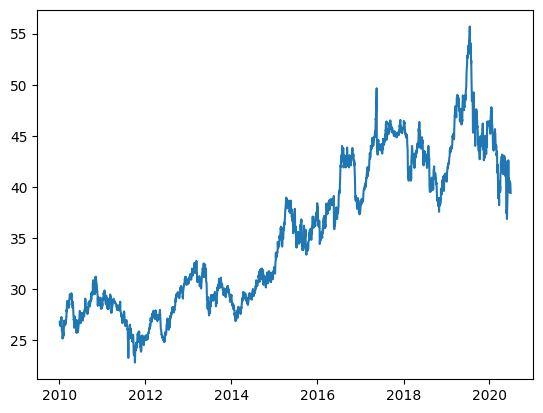

In [ ]:
plt.plot(df)

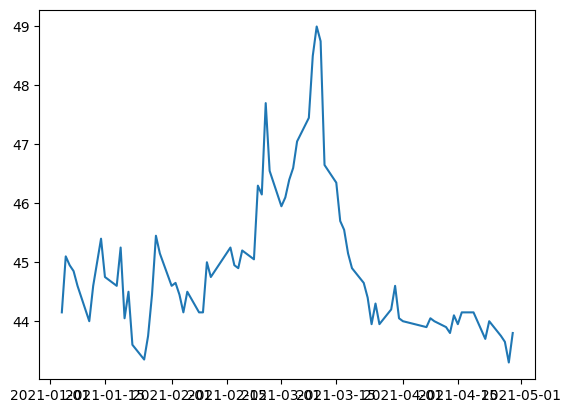

In [ ]:
plt.plot(df1)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
rdata = scaler.fit_transform(np.array(df).reshape(-1,1))
training_size=int(len(rdata)*0.65)
# 65：35
# 结束 结尾 合理分配
train_period,test_period=rdata[:training_size],rdata[training_size:]

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
rdata1 = scaler.fit_transform(np.array(df1).reshape(-1,1))
# 归一化
val_period = rdata1

In [ ]:
val_period.shape,train_period.shape,test_period.shape

((79, 1), (1681, 1), (906, 1))

In [ ]:
rdata

In [ ]:
train_period

In [ ]:
test_period

In [ ]:
from keras.preprocessing.sequence import TimeseriesGenerator
train = TimeseriesGenerator(train_period, train_period, length=100, batch_size=2000)
test = TimeseriesGenerator(test_period, test_period, length=100, batch_size=1000)
# length=10 创建时间序列 总个数为len(dataset)-length
# batch size 每批次 训练bs个时间序列
val = TimeseriesGenerator(val_period, val_period, length=10, batch_size=1000)
X_val, y_val = list(val)[0][0], list(val)[0][1]

X_train, y_train = list(train)[0][0], list(train)[0][1]
X_test, y_test = list(test)[0][0], list(test)[0][1]

In [ ]:
X_val.shape, X_train.shape , X_test.shape
# -100 = length

((69, 10, 1), (1581, 100, 1), (806, 100, 1))

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [ ]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=64,verbose=True)
# 有验证集 y_test与pred

Epoch 1/10
25/25 [==============================] - 5s 206ms/step - loss: 6.6626e-04 - val_loss: 0.0018
Epoch 2/10
25/25 [==============================] - 7s 273ms/step - loss: 6.4370e-04 - val_loss: 0.0016
Epoch 3/10
25/25 [==============================] - 6s 248ms/step - loss: 5.9663e-04 - val_loss: 0.0027
Epoch 4/10
25/25 [==============================] - 6s 241ms/step - loss: 5.4919e-04 - val_loss: 0.0020
Epoch 5/10
25/25 [==============================] - 5s 219ms/step - loss: 5.2656e-04 - val_loss: 0.0014
Epoch 6/10
25/25 [==============================] - 6s 238ms/step - loss: 4.7343e-04 - val_loss: 0.0012
Epoch 7/10
25/25 [==============================] - 6s 222ms/step - loss: 4.4397e-04 - val_loss: 0.0012
Epoch 8/10
25/25 [==============================] - 5s 215ms/step - loss: 4.6242e-04 - val_loss: 0.0014
Epoch 9/10
25/25 [==============================] - 6s 221ms/step - loss: 4.4027e-04 - val_loss: 0.0012
Epoch 10/10
25/25 [==============================] - 5s 217ms/st

In [ ]:
train_predict = scaler.inverse_transform(model.predict(X_train))
test_predict = scaler.inverse_transform(model.predict(X_test))



26/26 [==============================] - 1s 39ms/step


In [ ]:
val_predict = scaler.inverse_transform(model.predict(X_val))
# 从归一化后的范围恢复到原始数据的范围

3/3 [==============================] - 0s 8ms/step


In [ ]:
len(rdata)
# 2587-200= 806+1581

2587

In [ ]:

val_predict.shape, test_predict.shape ,train_predict.shape

((69, 1), (806, 1), (1581, 1))

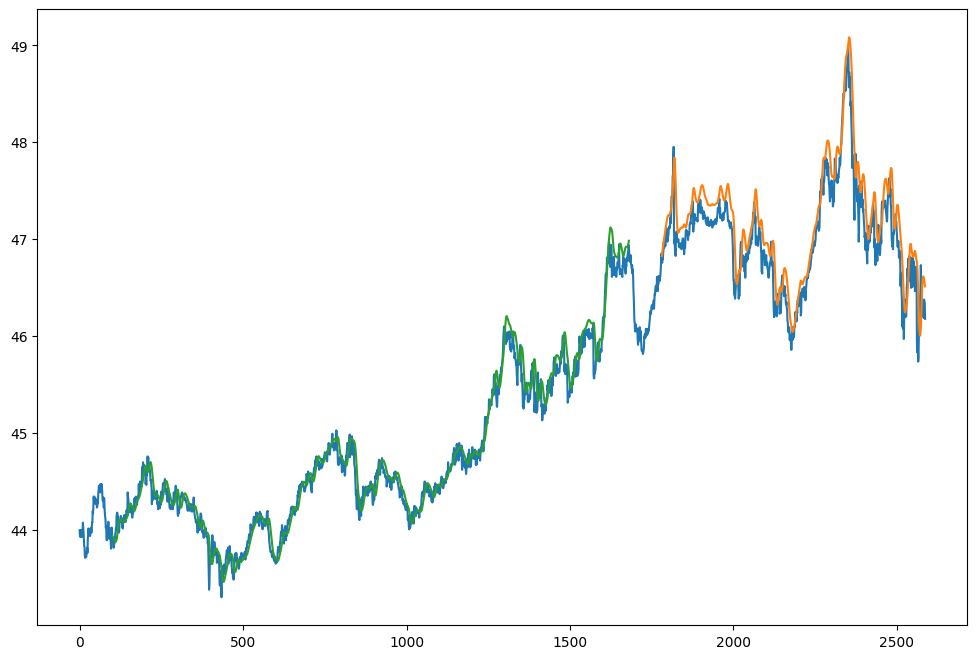

In [ ]:
look_back=100
# 因为时间序列导致缺失的100
# len(rdata)=2587
trainPredictPlot=np.empty_like(rdata)
trainPredictPlot[:,:]= np.nan
trainPredictPlot[look_back:len(train_predict)+look_back] = train_predict
# test_pre
# 前面是train
testPredictPlot=np.empty_like(rdata)
testPredictPlot[:,:] = np.nan
# testPredictPlot[len(train_predict)+(look_back*2):len(rdata)] = test_predict
testPredictPlot[len(rdata)-len(test_predict):len(rdata)] = test_predict
# 后面是test
plt.figure(figsize=(12,8))
plt.plot(scaler.inverse_transform(rdata))
plt.plot(testPredictPlot)
plt.plot(trainPredictPlot)

plt.show()

In [ ]:
testPredictPlot.shape
# len(rdata1)=79，len(val_predict)=69

79

Mean Squared Error: 0.8578303321716


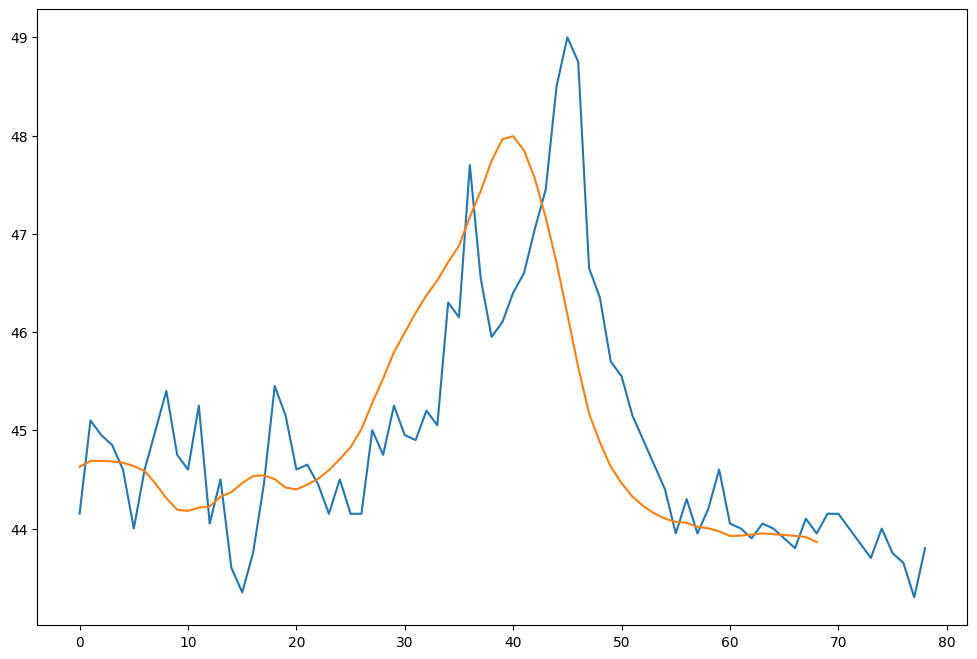

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error

look_back=10
valPredictPlot=np.empty_like(rdata1)
valPredictPlot[:,:]= np.nan
valPredictPlot[:len(val_predict)] = val_predict

plt.figure(figsize=(12,8))
plt.plot(scaler.inverse_transform(rdata1))
plt.plot(val_predict)
plt.show

mse = mean_squared_error(scaler.inverse_transform(rdata1)[:-look_back], val_predict)
print("Mean Squared Error:", mse)

In [ ]:

print(scaler.inverse_transform(rdata1))
print(val_predict)


[[44.15000153]
 [45.09999847]
 [44.95000076]
 [44.84999847]
 [44.59999847]
 [44.        ]
 [44.59999847]
 [45.        ]
 [45.40000153]
 [44.75      ]
 [44.59999847]
 [45.25      ]
 [44.04999924]
 [44.5       ]
 [43.59999847]
 [43.34999847]
 [43.75      ]
 [44.45000076]
 [45.45000076]
 [45.15000153]
 [44.59999847]
 [44.65000153]
 [44.45000076]
 [44.15000153]
 [44.5       ]
 [44.15000153]
 [44.15000153]
 [45.        ]
 [44.75      ]
 [45.25      ]
 [44.95000076]
 [44.90000153]
 [45.20000076]
 [45.04999924]
 [46.29999924]
 [46.15000153]
 [47.70000076]
 [46.54999924]
 [45.95000076]
 [46.09999847]
 [46.40000153]
 [46.59999847]
 [47.04999924]
 [47.45000076]
 [48.5       ]
 [49.        ]
 [48.75      ]
 [46.65000153]
 [46.34999847]
 [45.70000076]
 [45.54999924]
 [45.15000153]
 [44.90000153]
 [44.65000153]
 [44.40000153]
 [43.95000076]
 [44.29999924]
 [43.95000076]
 [44.20000076]
 [44.59999847]
 [44.04999924]
 [44.        ]
 [43.90000153]
 [44.04999924]
 [44.        ]
 [43.90000153]
 [43.79999